In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf

# Get the data
data = pd.read_csv('auto-mpg.csv')
print(data.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


Text(0, 0.5, 'Sales')

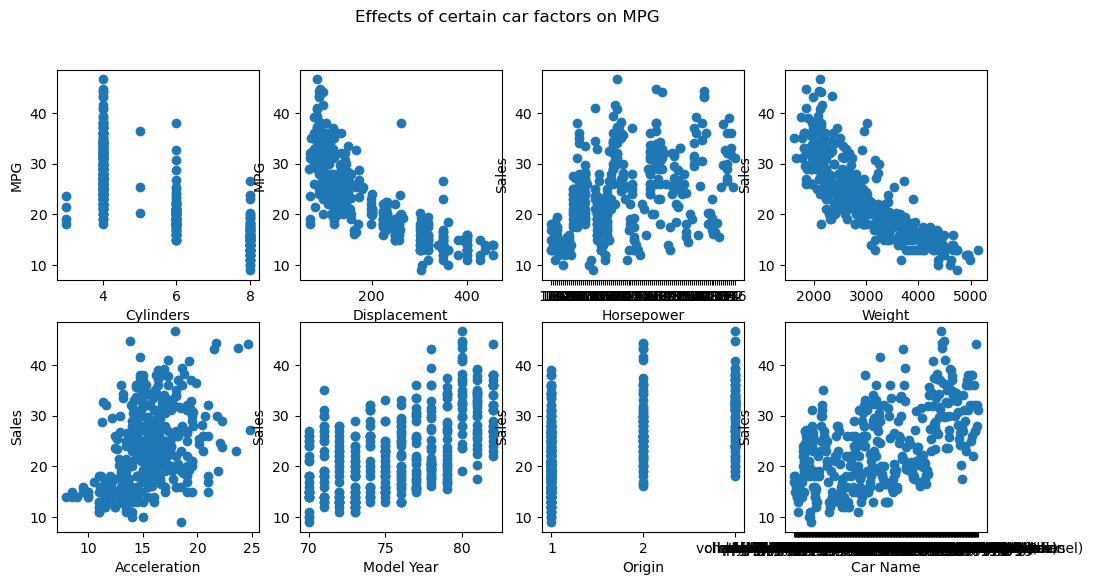

In [22]:
# Look at the data!  Create plots of Sales vs. each variable
fig, ax = plt.subplots(2, 4, figsize=(12,6))
fig.suptitle("Effects of certain car factors on MPG")
ax[0][0].plot(data['cylinders'], data['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[0][0].set_xlabel('Cylinders')
ax[0][0].set_ylabel('MPG')

ax[0][1].plot(data['displacement'], data['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[0][1].set_xlabel('Displacement')
ax[0][1].set_ylabel('MPG')

ax[0][2].plot(data['horsepower'], data['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[0][2].set_xlabel('Horsepower')
ax[0][2].set_ylabel('Sales')

ax[0][3].plot(data['weight'], data['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[0][3].set_xlabel('Weight')
ax[0][3].set_ylabel('Sales')

ax[1][0].plot(data['acceleration'], data['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[1][0].set_xlabel('Acceleration')
ax[1][0].set_ylabel('Sales')

ax[1][1].plot(data['model year'], data['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[1][1].set_xlabel('Model Year')
ax[1][1].set_ylabel('Sales')

ax[1][2].plot(data['origin'], data['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[1][2].set_xlabel('Origin')
ax[1][2].set_ylabel('Sales')

ax[1][3].plot(data['car name'], data['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[1][3].set_xlabel('Car Name')
ax[1][3].set_ylabel('Sales')

In [23]:
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

horse_med = data['horsepower'].median()
data['horsepower'] = data['horsepower'].fillna(horse_med)
    

In [24]:
data['cylinders_normalized'] = (data['cylinders'] - data['cylinders'].mean()) / data['cylinders'].std()
data['displacement_normalized'] = (data['displacement'] - data['displacement'].mean()) / data['displacement'].std()
data['horsepower_normalized'] = (data['horsepower'] - data['horsepower'].mean()) / data['horsepower'].std()
data['weight_normalized'] = (data['weight'] - data['weight'].mean()) / data['weight'].std()
data['acceleration_normalized'] = (data['acceleration'] - data['acceleration'].mean()) / data['acceleration'].std()
data['model_year_normalized'] = (data['model year'] - data['model year'].mean()) / data['model year'].std()
data['origin_normalized'] = (data['origin'] - data['origin'].mean()) / data['origin'].std()


In [25]:
# Fit a linear regression model
model = smf.ols('mpg ~ cylinders_normalized + displacement_normalized + horsepower_normalized + '
                'weight_normalized + acceleration_normalized + model_year_normalized + origin_normalized', data=data)
model = model.fit()

# View model summary
print(model.summary())

# Predict values
pred = model.predict()

# Add this prediction to the DataFrame
data['mpg_predicted'] = pred
# Add the DIFFERENCE between Height data and prediction to the DataFrame
data['mpg_residual'] = data['mpg'] - pred
print(data.head())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.4
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          2.15e-141
Time:                        16:29:08   Log-Likelihood:                -1040.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     390   BIC:                             2128.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

,0,1
Intercept,23.185726,23.843420
cylinders_normalized,-1.792107,0.361654
displacement_normalized,0.446161,3.527387
horsepower_normalized,-1.485649,0.538846
weight_normalized,-6.743713,-4.599538
acceleration_normalized,-0.255624,0.796716
model_year_normalized,2.427443,3.161806
origin_normalized,0.707370,1.577386


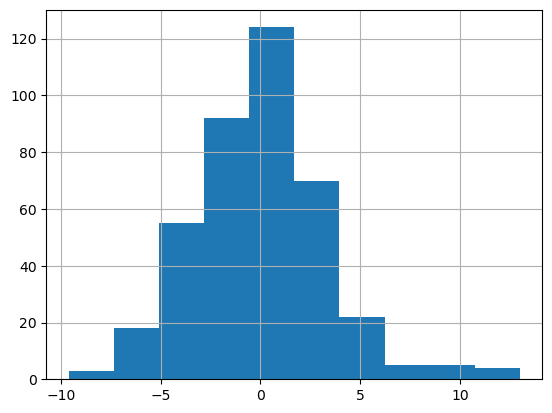

In [26]:
data['mpg_residual'].hist()
model.conf_int()

In [27]:
print(data['mpg_residual'].std())

3.307309209454171


In [28]:
# Fit a linear regression model
model2 = smf.ols('mpg ~ displacement_normalized + weight_normalized + model_year_normalized + origin_normalized', data=data)
model2 = model2.fit()

# View model summary
print(model2.summary())

# Predict values
pred2 = model2.predict()

# Add this prediction to the DataFrame
data['mpg_predicted'] = pred2
# Add the DIFFERENCE between Height data and prediction to the DataFrame
data['mpg_residual'] = data['mpg'] - pred2
print(data.head())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     442.2
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          5.29e-144
Time:                        16:29:09   Log-Likelihood:                -1043.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     393   BIC:                             2117.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [29]:
# Fit a linear regression model
model3 = smf.ols('mpg ~ cylinders_normalized + displacement_normalized + horsepower_normalized + '
                'weight_normalized + acceleration_normalized + model_year_normalized + origin_normalized + '
                 'cylinders_normalized*displacement_normalized + cylinders_normalized*horsepower_normalized + '
                 'cylinders_normalized*weight_normalized + cylinders_normalized*acceleration_normalized + '
                 'cylinders_normalized*model_year_normalized + cylinders_normalized*origin_normalized + '
                 'displacement_normalized*horsepower_normalized + displacement_normalized*weight_normalized + '
                 'displacement_normalized*acceleration_normalized + displacement_normalized*model_year_normalized + '
                 'displacement_normalized*origin_normalized + horsepower_normalized*weight_normalized + '
                 'horsepower_normalized*acceleration_normalized + horsepower_normalized*model_year_normalized + '
                 'horsepower_normalized*origin_normalized + weight_normalized*acceleration_normalized + '
                 'weight_normalized*model_year_normalized + weight_normalized*origin_normalized + '
                 'acceleration_normalized*model_year_normalized + acceleration_normalized*origin_normalized + '
                 'model_year_normalized*origin_normalized', data=data)
model3 = model3.fit()

# View model summary
print(model3.summary())

# Predict values
pred3 = model3.predict()

# Add this prediction to the DataFrame
data['mpg_predicted'] = pred3
# Add the DIFFERENCE between Height data and prediction to the DataFrame
data['mpg_residual'] = data['mpg'] - pred3
print(data.head())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     105.6
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          1.13e-157
Time:                        16:29:09   Log-Likelihood:                -945.09
No. Observations:                 398   AIC:                             1948.
Df Residuals:                     369   BIC:                             2064.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

,0,1
Intercept,23.185726,23.843420
cylinders_normalized,-1.792107,0.361654
displacement_normalized,0.446161,3.527387
horsepower_normalized,-1.485649,0.538846
weight_normalized,-6.743713,-4.599538
acceleration_normalized,-0.255624,0.796716
model_year_normalized,2.427443,3.161806
origin_normalized,0.707370,1.577386


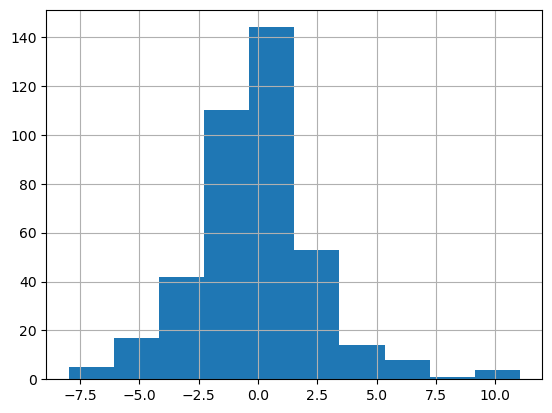

In [30]:
data['mpg_residual'].hist()
model.conf_int()

In [31]:
print(data['mpg_residual'].std())

2.6036618808754737


The significant interaction terms are displacement:weight, displacement:model year, acceleration:model year, 
acceleration:origin, and model year:origin.

This model is better than the first based on the standard deviation.

In [32]:
# Fit a linear regression model
model4 = smf.ols('mpg ~ horsepower_normalized + weight_normalized + model_year_normalized + origin_normalized + '
                 'displacement_normalized*weight_normalized + displacement_normalized*model_year_normalized + '
                 'acceleration_normalized*model_year_normalized + acceleration_normalized*origin_normalized + '
                 'model_year_normalized*origin_normalized', data=data)
model4 = model4.fit()

# View model summary
print(model4.summary())

# Predict values
pred4 = model4.predict()

# Add this prediction to the DataFrame
data['mpg_predicted'] = pred4
# Add the DIFFERENCE between Height data and prediction to the DataFrame
data['mpg_residual'] = data['mpg'] - pred4
print(data.head())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     253.0
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          7.68e-169
Time:                        16:29:11   Log-Likelihood:                -963.66
No. Observations:                 398   AIC:                             1951.
Df Residuals:                     386   BIC:                             1999.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [44]:
print(f"This model gives a standard deviation of {data['mpg_residual'].std():.5}.")


This model gives a standard deviation of 2.728.
